In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
# Reading the data
btc_eur = pd.read_csv('BTC-EUR.csv')
#btc_eur = datetime.strptime(btc_eur, "%d-%m-%Y")
btc_eur.Date = pd.to_datetime(btc_eur.Date,format='%d-%m-%Y')
btc_eur.index = pd.DatetimeIndex(pd.to_datetime(btc_eur.Date,format='%d-%m-%Y'))
#btc_eur.Date -
#btc_eur = btc_eur.asfreq('b')
btc_eur.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-01-01,2021-01-01,23735.42383,24316.91602,23649.96094,24165.55664,24165.55664,3.350805e+10
2021-01-02,2021-01-02,24167.45117,27321.90625,23972.96680,26474.89258,26474.89258,5.592538e+10
2021-01-03,2021-01-03,26476.65625,28519.63086,26413.12891,26760.72070,26760.72070,6.421624e+10
2021-01-04,2021-01-04,26784.33203,27294.24023,23363.98047,26094.00586,26094.00586,6.624190e+10
2021-01-05,2021-01-05,26098.18945,28009.36719,24633.16797,27639.48242,27639.48242,5.492320e+10
2021-01-06,2021-01-06,27656.70898,29889.70508,27254.71875,29844.85938,29844.85938,6.101945e+10


In [3]:
# Reading the data
gtrends = pd.read_excel('Gtrends.xlsx')
gtrends.index = pd.DatetimeIndex(pd.to_datetime(gtrends.Date,format='%d-%m-%Y'))
#gtrends = gtrends.asfreq('b')
gtrends.head(6)

,Date,Gtrends
Date,,
2021-01-01,2021-01-01,139.530
2021-01-02,2021-01-02,243.368
2021-01-03,2021-01-03,285.763
2021-01-04,2021-01-04,235.192
2021-01-05,2021-01-05,195.552
2021-01-06,2021-01-06,222.708


In [4]:
# Reading the data
tweets = pd.read_excel('Tweets.xlsx')
tweets.index = pd.DatetimeIndex(pd.to_datetime(tweets.Date,format='%d-%m-%Y'))
#gtrends = gtrends.asfreq('b')
tweets.head(6)

,Date,Tweets
Date,,
2021-01-01,2021-01-01,55480
2021-01-02,2021-01-02,145059
2021-01-03,2021-01-03,141596
2021-01-04,2021-01-04,82412
2021-01-05,2021-01-05,68133
2021-01-06,2021-01-06,86631


In [5]:
# Reading the data
hashrate = pd.read_excel('hashrate.xlsx')
hashrate.index = pd.DatetimeIndex(pd.to_datetime(hashrate.Date,format='%d-%m-%Y'))
#gtrends = gtrends.asfreq('b')
hashrate.head(6)

,Date,Hashrate
Date,,
2020-01-01,2020-01-01,1.025008e+20
2020-01-02,2020-01-02,1.145010e+20
2020-01-03,2020-01-03,1.073170e+20
2020-01-04,2020-01-04,1.091940e+20
2020-01-05,2020-01-05,1.171573e+20
2020-01-06,2020-01-06,1.038791e+20


In [6]:
btc_eur.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
btc_eur = btc_eur.fillna(method='ffill')
btc_eur.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
hashrate.isna().sum()

Date        0
Hashrate    0
dtype: int64

In [9]:
gtrends.isna().sum()

Date       0
Gtrends    0
dtype: int64

In [10]:
tweets.isna().sum()

Date      0
Tweets    0
dtype: int64

In [11]:
tweets = tweets.fillna(method='ffill')
tweets.isna().sum()

Date      0
Tweets    0
dtype: int64

In [12]:
crypto_data = btc_eur
crypto_data['Hashrate'] = hashrate.Hashrate
crypto_data['Gtrends'] = gtrends.Gtrends
crypto_data['Tweets'] = tweets.Tweets
crypto_data.drop('Date', inplace=True, axis=1)
crypto_data.drop('Adj Close', inplace=True, axis=1)
crypto_data

,Open,High,Low,Close,Volume,Hashrate,Gtrends,Tweets
Date,,,,,,,,
2021-01-01,23735.42383,24316.91602,23649.96094,24165.55664,3.350805e+10,1.500531e+20,139.530,55480
2021-01-02,24167.45117,27321.90625,23972.96680,26474.89258,5.592538e+10,1.365966e+20,243.368,145059
2021-01-03,26476.65625,28519.63086,26413.12891,26760.72070,6.421624e+10,1.419998e+20,285.763,141596
2021-01-04,26784.33203,27294.24023,23363.98047,26094.00586,6.624190e+10,1.574032e+20,235.192,82412
2021-01-05,26098.18945,28009.36719,24633.16797,27639.48242,5.492320e+10,1.504341e+20,195.552,68133
...,...,...,...,...,...,...,...,...
2021-06-26,26466.72266,27343.60742,25288.42383,26965.50195,3.232664e+10,1.010427e+20,123.001,105096
2021-06-27,27050.32617,29021.04102,26869.55859,29013.74219,2.973553e+10,7.566617e+19,121.520,122259
2021-06-28,29038.42383,29497.71680,28473.47266,28866.30273,2.841210e+10,6.800884e+19,123.001,128407


In [13]:
crypto_data.to_csv('Crypto_data_preprocessed.csv')
crypto_data.describe()

,Open,High,Low,Close,Volume,Hashrate,Gtrends,Tweets
count,181.000000,181.000000,181.000000,181.000000,1.810000e+02,1.810000e+02,181.000000,181.000000
mean,38122.276999,39385.475657,36601.398956,38143.093190,5.092516e+10,1.513675e+20,178.844796,110860.569061
std,8583.185400,8555.497742,8625.390758,8553.433686,2.294337e+10,2.110849e+19,61.726537,43368.211119
min,23735.423830,24316.916020,23363.980470,24165.556640,2.376323e+10,6.800884e+19,99.221000,30540.000000
25%,30039.070310,31129.619140,28679.753910,30071.781250,4.007602e+10,1.427373e+20,136.247000,84933.000000
50%,38462.882810,40021.406250,37313.160160,38498.738280,4.825038e+10,1.536932e+20,158.532000,103733.000000
75%,46757.011720,47962.664060,44874.660160,46749.441410,5.752880e+10,1.645881e+20,207.330000,125027.000000
max,53140.605470,54238.394530,51988.964840,53123.628910,2.907270e+11,1.976095e+20,505.899000,363566.000000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

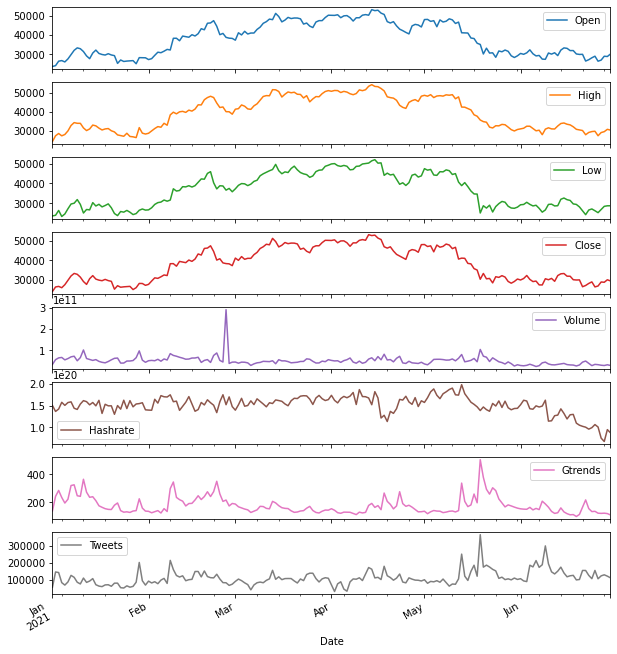

In [14]:
crypto_data.plot(subplots=True, figsize=(10,12))

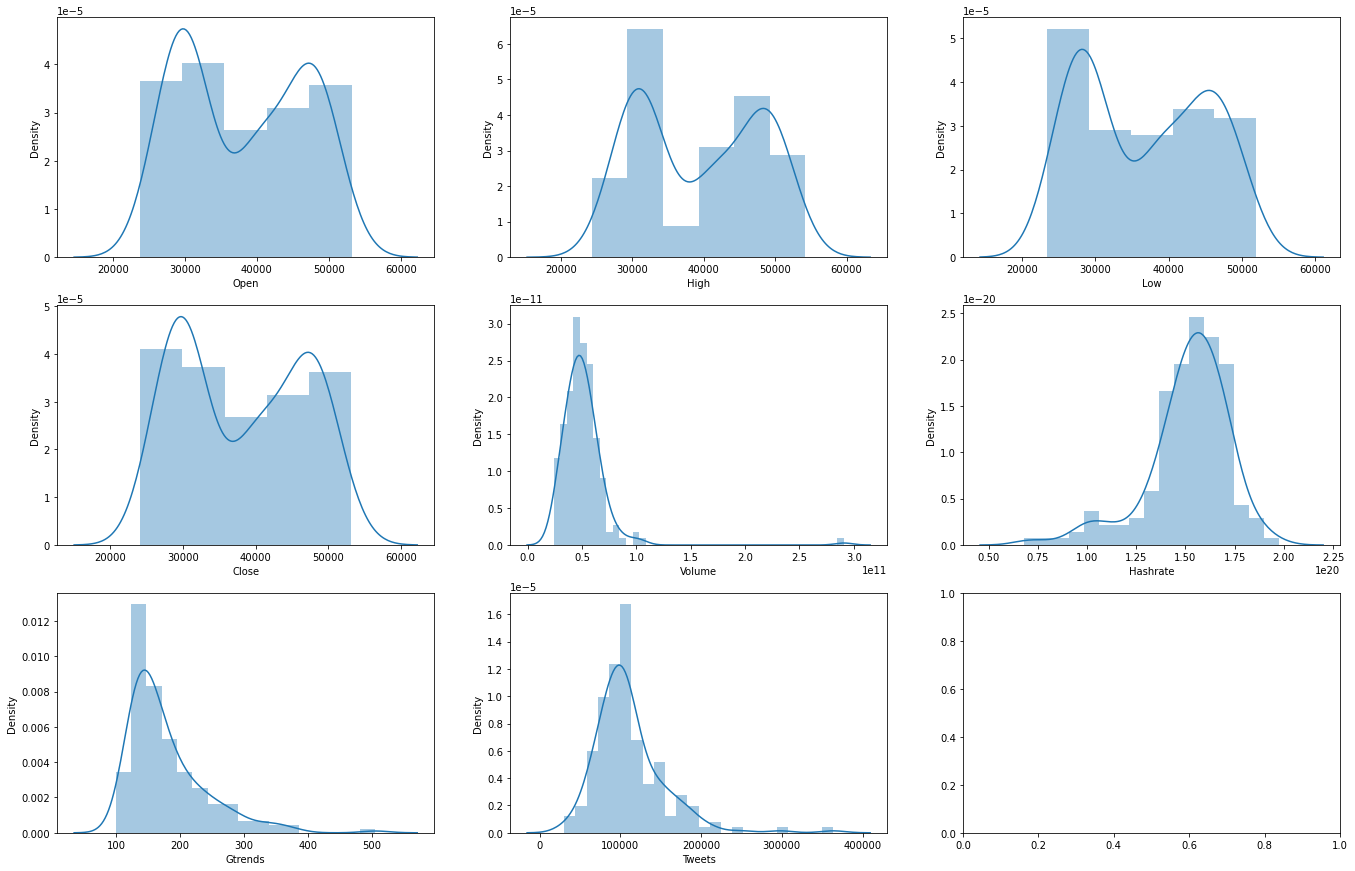

In [15]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3,3,figsize=(23,15))

i = 0
for idx,col in enumerate(crypto_data.columns):
    sub_dim_x,sub_dim_y = divmod(idx, 3)
    sns.distplot(crypto_data[col],ax=axs[sub_dim_x,sub_dim_y])

In [16]:
cor_matx = crypto_data[list(crypto_data.columns)].corr()
c = cor_matx.values

# Choosing lower triangular matrix and setting diagonal and upper triangular values as Null
cor_matx = pd.DataFrame(np.tril(c),index=cor_matx.index , columns=cor_matx.columns)
cor_matx = cor_matx[(cor_matx != 0) ]
cor_matx = cor_matx[cor_matx !=1]
cor_matx

,Open,High,Low,Close,Volume,Hashrate,Gtrends,Tweets
Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High,0.992232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low,0.984739,0.986265,NaN,NaN,NaN,NaN,NaN,NaN
Close,0.979266,0.991373,0.990556,NaN,NaN,NaN,NaN,NaN
Volume,0.084828,0.098076,0.027306,0.065026,NaN,NaN,NaN,NaN
Hashrate,0.490676,0.504309,0.499195,0.502214,0.178268,NaN,NaN,NaN
Gtrends,-0.135580,-0.109997,-0.218927,-0.149425,0.477612,0.043330,NaN,NaN
Tweets,-0.129705,-0.100180,-0.177220,-0.129939,0.129342,-0.192676,0.514187,NaN


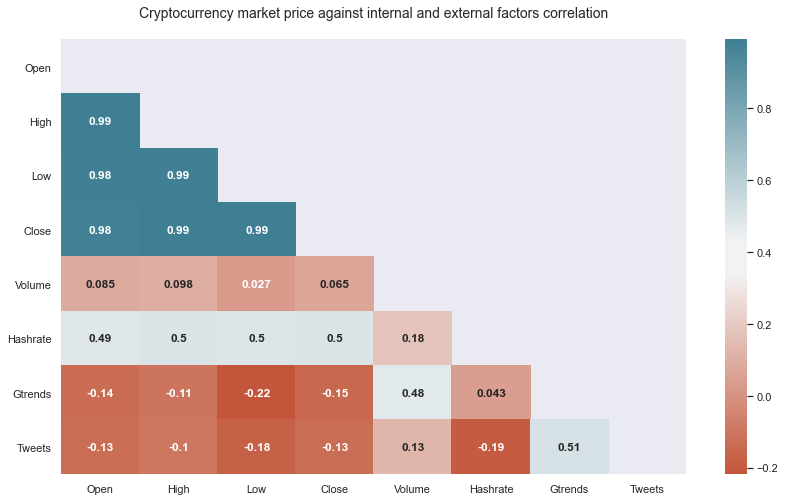

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(14,8))
columns = ['Open','High','Low','Close','Volume','Hashrate','Gtrends','Tweets']

# Setting a diverging scale from red to green
cmap = sns.diverging_palette(20, 220, sep=20, as_cmap=True)

hmap = sns.heatmap(cor_matx, annot=True,cmap=cmap,annot_kws={"fontsize":12,"weight":'bold'})
hmap.set_xticklabels(labels = columns, rotation=0)
hmap.set_yticklabels(labels = columns, rotation=0)
plt.title('Cryptocurrency market price against internal and external factors correlation\n',fontsize=14)


plt.show()

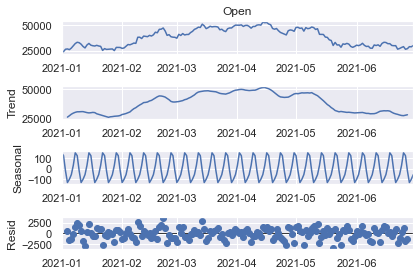

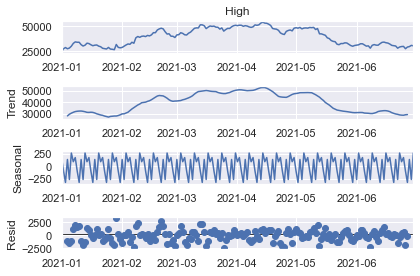

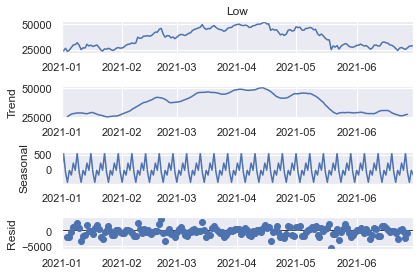

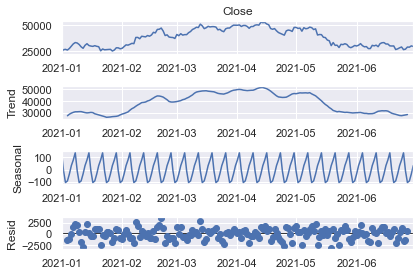

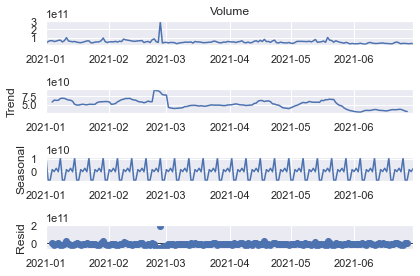

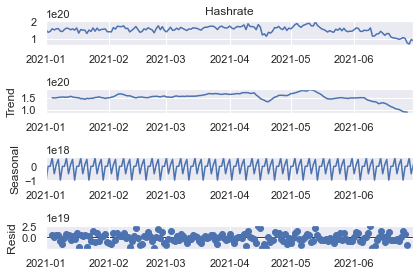

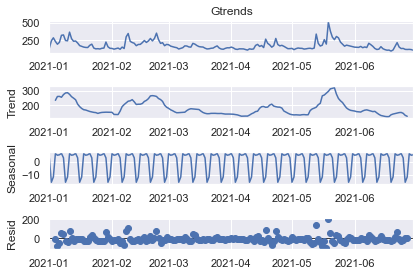

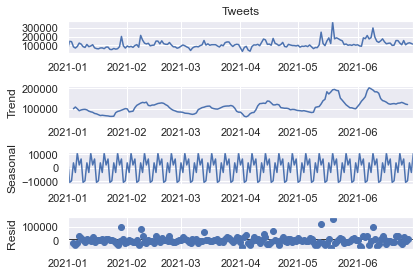

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

for col in crypto_data.columns:
    seasonal_decompose(crypto_data[col]).plot();

Open
(-14.655436458824443, 3.447302892845991e-27, 0, 179, {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}, 2935.4320464558136)
High
(-8.223983274142954, 6.318560870151184e-13, 1, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 2881.8279755101207)
Low
(-13.639651790935362, 1.6625023008995983e-25, 0, 179, {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}, 2949.459955752686)
Close
(-14.691211640400466, 3.0474214634369762e-27, 0, 179, {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}, 2934.890755220054)
Volume
(-9.157850716249758, 2.58064237991392e-15, 4, 175, {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}, 8354.523367563837)
Hashrate
(-9.458338129357639, 4.4225851923772837e-16, 3, 176, {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}, 14979.599864118232)
Gtrends
(-11.170681404682474, 2.64

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

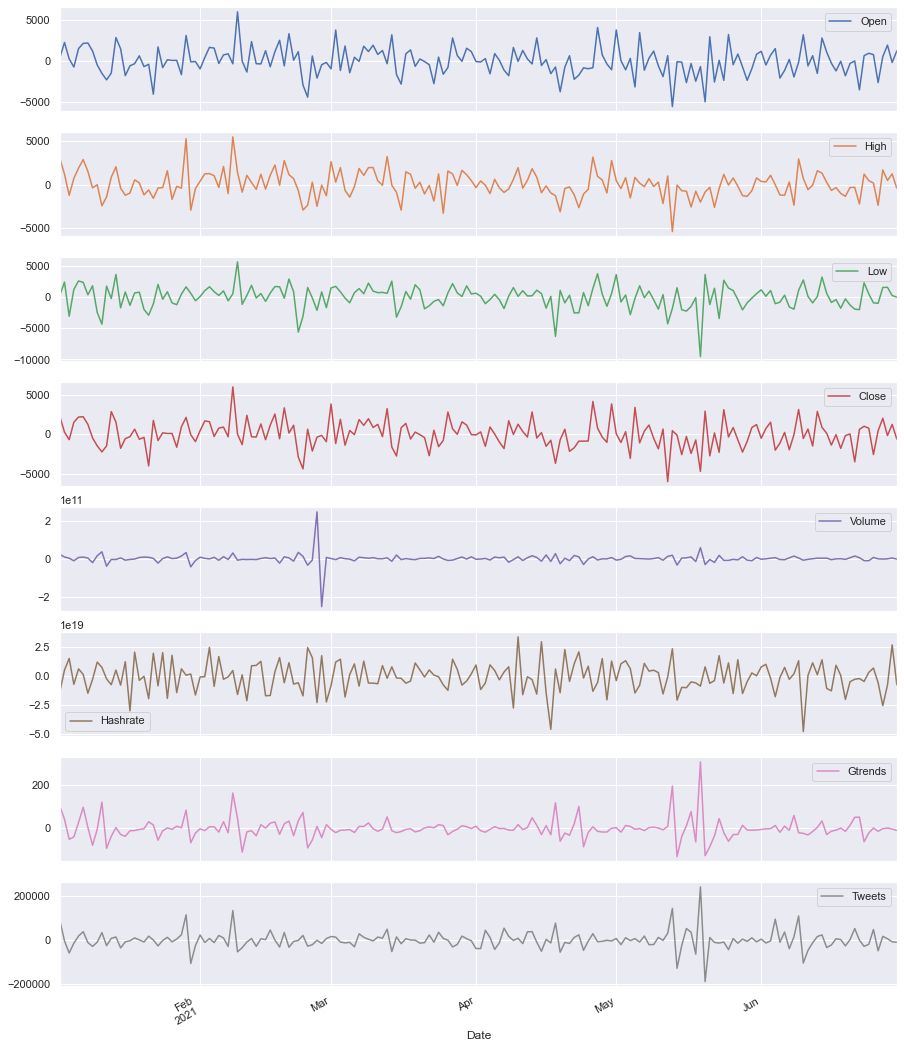

In [19]:
from statsmodels.tsa.stattools import adfuller

diff_d = {}
for col in crypto_data.columns:
    print(col)
    print(adfuller(crypto_data[col].diff()[1:]))
    diff_d[col] = crypto_data[col].diff()[1:]
pd.DataFrame(diff_d).plot(subplots=True,figsize=(15,20))

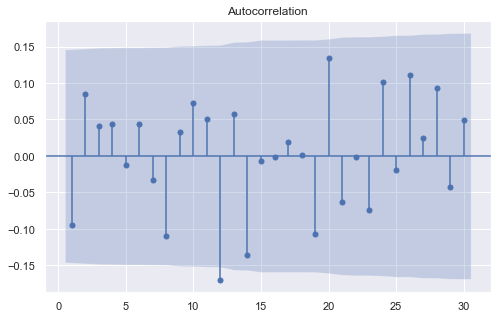

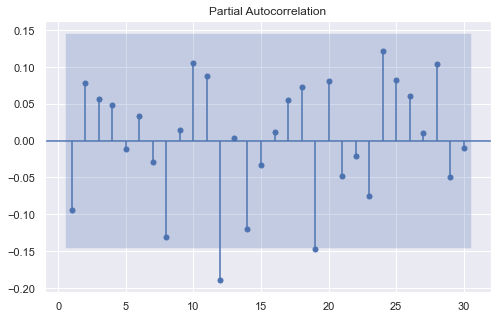

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p = plot_acf(crypto_data.Close.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

p = plot_pacf(crypto_data.Close.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

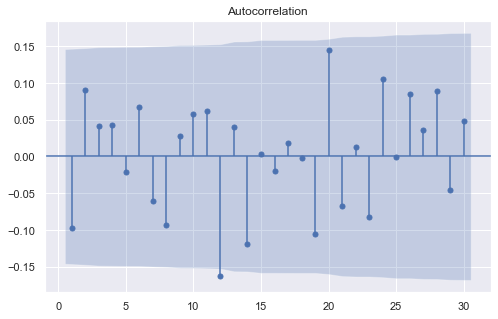

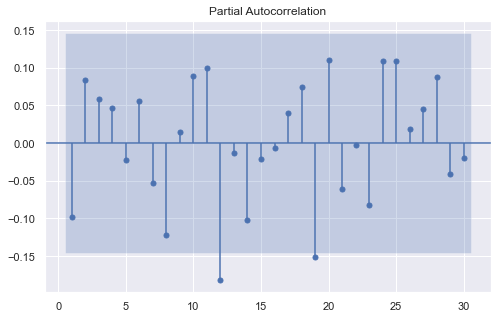

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p = plot_acf(crypto_data.Open.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

p = plot_pacf(crypto_data.Open.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

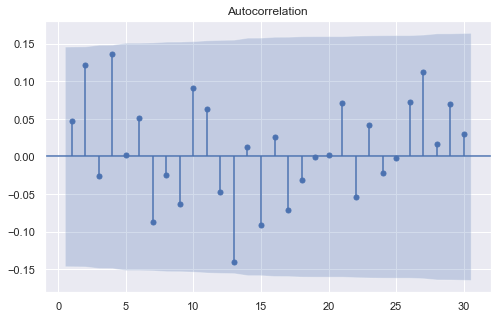

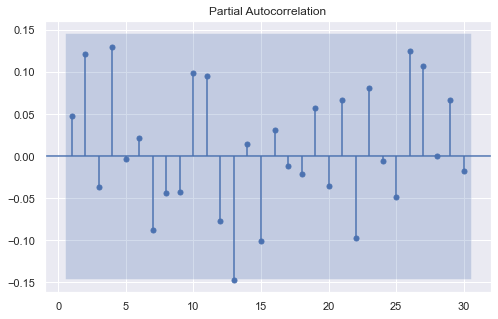

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p = plot_acf(crypto_data.High.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

p = plot_pacf(crypto_data.High.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

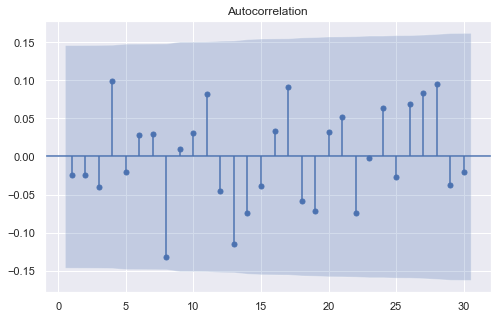

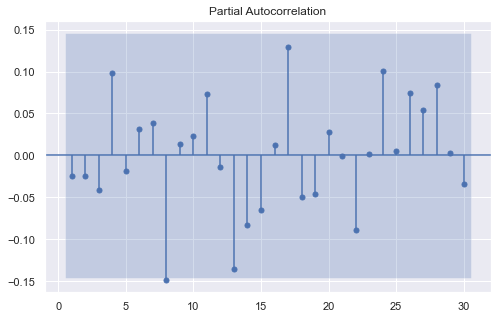

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p = plot_acf(crypto_data.Low.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

p = plot_pacf(crypto_data.Low.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

In [24]:
import statsmodels.tsa as sm

In [25]:
sm.stattools.grangercausalitytests(crypto_data[['Close','Volume']],maxlag = 20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0138  , p=0.9067  , df_denom=177, df_num=1
ssr based chi2 test:   chi2=0.0140  , p=0.9058  , df=1
likelihood ratio test: chi2=0.0140  , p=0.9058  , df=1
parameter F test:         F=0.0138  , p=0.9067  , df_denom=177, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5817  , p=0.5600  , df_denom=174, df_num=2
ssr based chi2 test:   chi2=1.1968  , p=0.5497  , df=2
likelihood ratio test: chi2=1.1928  , p=0.5508  , df=2
parameter F test:         F=0.5817  , p=0.5600  , df_denom=174, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5859  , p=0.1946  , df_denom=171, df_num=3
ssr based chi2 test:   chi2=4.9524  , p=0.1753  , df=3
likelihood ratio test: chi2=4.8848  , p=0.1804  , df=3
parameter F test:         F=1.5859  , p=0.1946  , df_denom=171, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3184  , p=0.2651  

{1: ({'ssr_ftest': (0.013779988310222563, 0.9066855362431583, 177.0, 1),
   'ssr_chi2test': (0.01401354743412464, 0.9057674988948097, 1),
   'lrtest': (0.014013001963576244, 0.905769324339215, 1),
   'params_ftest': (0.013779988239163649, 0.906685536482745, 177.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.5816741023139723, 0.5600449580889645, 174.0, 2),
   'ssr_chi2test': (1.1967777507379431, 0.5496965527027886, 2),
   'lrtest': (1.1927947206331737, 0.5507923724703405, 2),
   'params_ftest': (0.5816741745561351, 0.5600449178988061, 174.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.5858872548624519, 0.19460763430969905, 171.0, 3),
   'ssr_chi2test': (4.952419848517833, 0.1753145356283316, 3),
   'lrtest': (4.884777088957435, 0.1804313941326167, 3),
   'params_ftest': (1.5858862079640232, 0.19460788645493918, 171.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [26]:
sm.stattools.grangercausalitytests(crypto_data[['Close','Hashrate']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=-169.1165, p=1.0000  , df_denom=179, df_num=1
ssr based chi2 test:   chi2=-170.0613, p=1.0000  , df=1
likelihood ratio test: chi2=-521.3735, p=1.0000  , df=1
parameter F test:         F=4833.2936, p=0.0000  , df_denom=179, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=-83.3685, p=1.0000  , df_denom=177, df_num=2
ssr based chi2 test:   chi2=-168.6211, p=1.0000  , df=2
likelihood ratio test: chi2=-509.7227, p=1.0000  , df=2
parameter F test:         F=2545.0700, p=0.0000  , df_denom=177, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=-54.8519, p=1.0000  , df_denom=175, df_num=3
ssr based chi2 test:   chi2=-167.3767, p=1.0000  , df=3
likelihood ratio test: chi2=-501.7351, p=1.0000  , df=3
parameter F test:         F=1736.9885, p=0.0000  , df_denom=175, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=-40.6019, 

{1: ({'ssr_ftest': (-169.11650594358375, 1.0, 179.0, 1),
   'ssr_chi2test': (-170.06129089298923, 1.0, 1),
   'lrtest': (-521.3735472897647, 1.0, 1),
   'params_ftest': (4833.293623261678, 1.8188378162347443e-131, 179.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (-83.36854179807843, 1.0, 177.0, 2),
   'ssr_chi2test': (-168.6211184390513, 1.0, 2),
   'lrtest': (-509.72267031701904, 1.0, 2),
   'params_ftest': (2545.069952661783, 3.8570873650525214e-131, 177.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (-54.851924923869575, 1.0, 175.0, 3),
   'ssr_chi2test': (-167.37673091055058, 1.0, 3),
   'lrtest': (-501.735142920626, 1.0, 3),
   'params_ftest': (1736.9885175227016, 6.287669997151657e-130, 175.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])]),
 4: ({'ssr_ftest': (-40.60192819453189, 1.0, 173.0, 4),
   'ssr_chi2test': (-166.16280440305533, 1

In [27]:
sm.stattools.grangercausalitytests(crypto_data[['Close','Gtrends']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4037  , p=0.5260  , df_denom=177, df_num=1
ssr based chi2 test:   chi2=0.4106  , p=0.5217  , df=1
likelihood ratio test: chi2=0.4101  , p=0.5219  , df=1
parameter F test:         F=0.4037  , p=0.5260  , df_denom=177, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8641  , p=0.1581  , df_denom=174, df_num=2
ssr based chi2 test:   chi2=3.8352  , p=0.1470  , df=2
likelihood ratio test: chi2=3.7947  , p=0.1500  , df=2
parameter F test:         F=1.8641  , p=0.1581  , df_denom=174, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3563  , p=0.2579  , df_denom=171, df_num=3
ssr based chi2 test:   chi2=4.2356  , p=0.2371  , df=3
likelihood ratio test: chi2=4.1860  , p=0.2421  , df=3
parameter F test:         F=1.3563  , p=0.2579  , df_denom=171, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6004  , p=0.1765  

{1: ({'ssr_ftest': (0.40371436874450395, 0.5259977904505511, 177.0, 1),
   'ssr_chi2test': (0.4105569851639023, 0.521686937010392, 1),
   'lrtest': (0.41008948191074523, 0.5219240913708323, 1),
   'params_ftest': (0.40371436874441163, 0.5259977904506015, 177.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.8640543537619862, 0.15812561052167828, 174.0, 2),
   'ssr_chi2test': (3.835238268085006, 0.14695642950802942, 2),
   'lrtest': (3.7947291376058274, 0.14996331689867626, 2),
   'params_ftest': (1.8640543537620198, 0.15812561052167387, 174.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.3563485279503225, 0.2579126463961106, 171.0, 3),
   'ssr_chi2test': (4.235614701318552, 0.23712027951241055, 3),
   'lrtest': (4.186005672650481, 0.24206672269882704, 3),
   'params_ftest': (1.356348527950421, 0.2579126463960814, 171.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [28]:
sm.stattools.grangercausalitytests(crypto_data[['Close','Tweets']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9830  , df_denom=177, df_num=1
ssr based chi2 test:   chi2=0.0005  , p=0.9828  , df=1
likelihood ratio test: chi2=0.0005  , p=0.9828  , df=1
parameter F test:         F=0.0005  , p=0.9830  , df_denom=177, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9885  , p=0.0530  , df_denom=174, df_num=2
ssr based chi2 test:   chi2=6.1487  , p=0.0462  , df=2
likelihood ratio test: chi2=6.0454  , p=0.0487  , df=2
parameter F test:         F=2.9885  , p=0.0530  , df_denom=174, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1916  , p=0.0908  , df_denom=171, df_num=3
ssr based chi2 test:   chi2=6.8439  , p=0.0770  , df=3
likelihood ratio test: chi2=6.7156  , p=0.0815  , df=3
parameter F test:         F=2.1916  , p=0.0908  , df_denom=171, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6969  , p=0.1530  

{1: ({'ssr_ftest': (0.00045448693594486814, 0.983015441006639, 177.0, 1),
   'ssr_chi2test': (0.0004621901043507133, 0.9828479146339593, 1),
   'lrtest': (0.00046218951047194423, 0.982847925651821, 1),
   'params_ftest': (0.00045448692635810056, 0.9830154411861666, 177.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.988450247570751, 0.052957291096547066, 174.0, 2),
   'ssr_chi2test': (6.1486505093697055, 0.046220805134039984, 2),
   'lrtest': (6.045405101592678, 0.04866950864672926, 2),
   'params_ftest': (2.9884502475707073, 0.052957291096549196, 174.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.191572798733815, 0.09084390733369678, 171.0, 3),
   'ssr_chi2test': (6.843858915344194, 0.07704459364944435, 3),
   'lrtest': (6.715568433856333, 0.08153788860799088, 3),
   'params_ftest': (2.191572798733874, 0.09084390733368974, 171.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
     

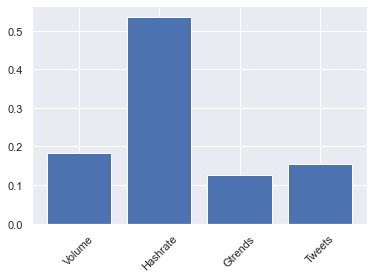

In [29]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

train_cols = ['Volume', 'Hashrate', 'Gtrends','Tweets']
train_x, train_y = crypto_data[train_cols].values , crypto_data['Close'].values

model = DecisionTreeRegressor()
# fit the model
model.fit(train_x, train_y)
# get importance
importance = model.feature_importances_


# plot feature importance
pyplot.bar([x for x in train_cols], importance)
pyplot.xticks(rotation=45)
pyplot.show()

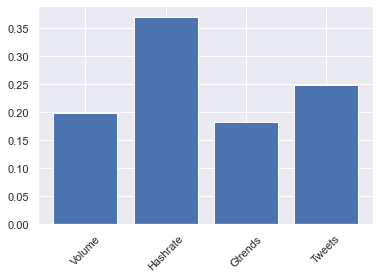

In [30]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

train_cols = ['Volume', 'Hashrate', 'Gtrends','Tweets']
train_x, train_y = crypto_data[train_cols].values , crypto_data['Open'].values

model = DecisionTreeRegressor()
# fit the model
model.fit(train_x, train_y)
# get importance
importance = model.feature_importances_


# plot feature importance
pyplot.bar([x for x in train_cols], importance)
pyplot.xticks(rotation=45)
pyplot.show()

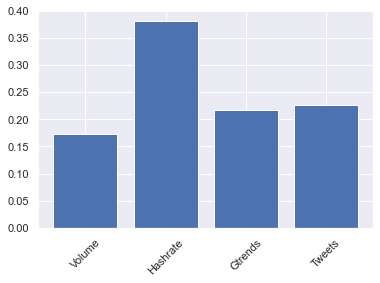

In [31]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

train_cols = ['Volume', 'Hashrate', 'Gtrends','Tweets']
train_x, train_y = crypto_data[train_cols].values , crypto_data['High'].values

model = DecisionTreeRegressor()
# fit the model
model.fit(train_x, train_y)
# get importance
importance = model.feature_importances_


# plot feature importance
pyplot.bar([x for x in train_cols], importance)
pyplot.xticks(rotation=45)
pyplot.show()

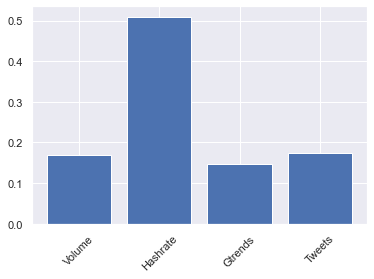

In [32]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

train_cols = ['Volume', 'Hashrate', 'Gtrends','Tweets']
train_x, train_y = crypto_data[train_cols].values , crypto_data['Low'].values

model = DecisionTreeRegressor()
# fit the model
model.fit(train_x, train_y)
# get importance
importance = model.feature_importances_


# plot feature importance
pyplot.bar([x for x in train_cols], importance)
pyplot.xticks(rotation=45)
pyplot.show()

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [34]:
crypto_data_close = pd.read_csv('Crypto_data_preprocessed.csv',index_col=0)
crypto_data_close

,Open,High,Low,Close,Volume,Hashrate,Gtrends,Tweets
Date,,,,,,,,
2021-01-01,23735.42383,24316.91602,23649.96094,24165.55664,3.350805e+10,1.500531e+20,139.530,55480
2021-01-02,24167.45117,27321.90625,23972.96680,26474.89258,5.592538e+10,1.365966e+20,243.368,145059
2021-01-03,26476.65625,28519.63086,26413.12891,26760.72070,6.421624e+10,1.419998e+20,285.763,141596
2021-01-04,26784.33203,27294.24023,23363.98047,26094.00586,6.624190e+10,1.574032e+20,235.192,82412
2021-01-05,26098.18945,28009.36719,24633.16797,27639.48242,5.492320e+10,1.504341e+20,195.552,68133
...,...,...,...,...,...,...,...,...
2021-06-26,26466.72266,27343.60742,25288.42383,26965.50195,3.232664e+10,1.010427e+20,123.001,105096
2021-06-27,27050.32617,29021.04102,26869.55859,29013.74219,2.973553e+10,7.566617e+19,121.520,122259
2021-06-28,29038.42383,29497.71680,28473.47266,28866.30273,2.841210e+10,6.800884e+19,123.001,128407


In [35]:
from  pmdarima.arima import auto_arima

arima_model = auto_arima(crypto_data_close.Close.iloc[:-30],seasonal=False,trace=True,error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2683.994, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2678.321, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2680.338, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2680.327, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2676.407, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2681.937, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.940 seconds


In [36]:
arima_model = arima_model.fit(crypto_data_close.Close.iloc[:-30])
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1337.204
Date:                Fri, 13 Aug 2021   AIC                           2676.407
Time:                        10:45:33   BIC                           2679.418
Sample:                             0   HQIC                          2677.630
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.22e+06      3e+05     10.745      0.000    2.63e+06    3.81e+06
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):                 6.83
Prob(Q):                              0.29   Pr

In [37]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)*100)

In [38]:
fit =  np.append(arima_model.predict_in_sample(),np.repeat(np.nan,30, axis=0))[1:] # first value is zero since we did differencing
pred = np.append(np.repeat(np.nan,len(fit[:-30]), axis=0),arima_model.predict(n_periods=30))

pred_conf_int = arima_model.predict(n_periods=30,return_conf_int =True)[1]

arima_inr_forecast = pred[-30:]

from sklearn.metrics import mean_squared_error

def get_metrics(weeks,actual,pred):
    print('{} weeks forecast metrics'.format(weeks))
    span = 7*weeks
    error = mean_squared_error(actual[:span], pred[:span])
    print('Test RMSE: {}'.format(np.sqrt(error)))
    print('Test MAPE: {}\n'.format(mean_absolute_percentage_error(actual[:span], pred[:span])))

get_metrics(2,crypto_data_close.Close[-30:],pred[-30:])
get_metrics(4,crypto_data_close.Close[-30:],pred[-30:])

2 weeks forecast metrics
Test RMSE: 1609.118892820932
Test MAPE: 4.1921343619221725

4 weeks forecast metrics
Test RMSE: 2035.6704582991738
Test MAPE: 5.696922996737641



,Actual,Predicted,Fitted
Date,,,
2021-02-01,27790.58203,NaN,27316.09961
2021-02-02,29501.52148,NaN,27790.58203
2021-02-03,31119.44727,NaN,29501.52148
2021-02-04,30859.55469,NaN,31119.44727
2021-02-05,31658.24805,NaN,30859.55469
...,...,...,...
2021-06-26,26965.50195,30519.30859,NaN
2021-06-27,29013.74219,30519.30859,NaN
2021-06-28,28866.30273,30519.30859,NaN


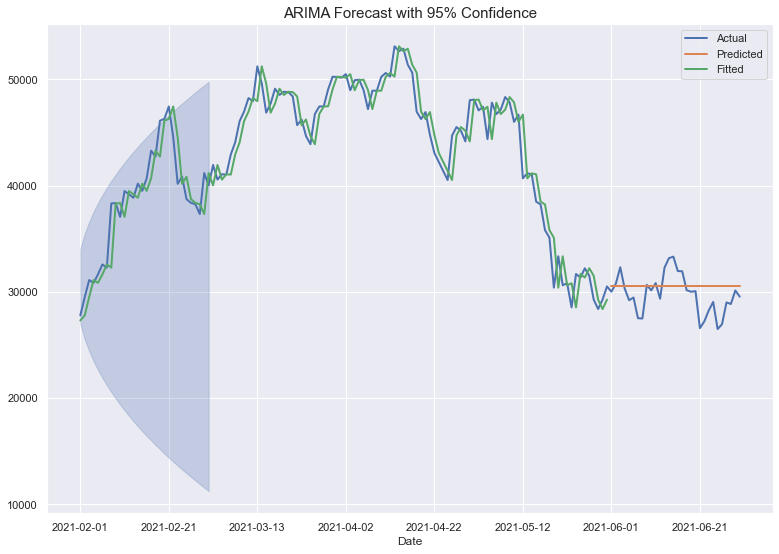

In [39]:
forecast_df = pd.DataFrame({'Actual': crypto_data_close.Close[-150:],'Predicted' : pred[-150:],'Fitted' : fit[-150:]})
forecast_df.plot(figsize=(13,9),lw=2)

plt.fill_between(forecast_df.index[-30:], pred_conf_int[:,0], pred_conf_int[:,1], color='b', alpha=.25)

plt.title('ARIMA Forecast with 95% Confidence',size=15)
forecast_df

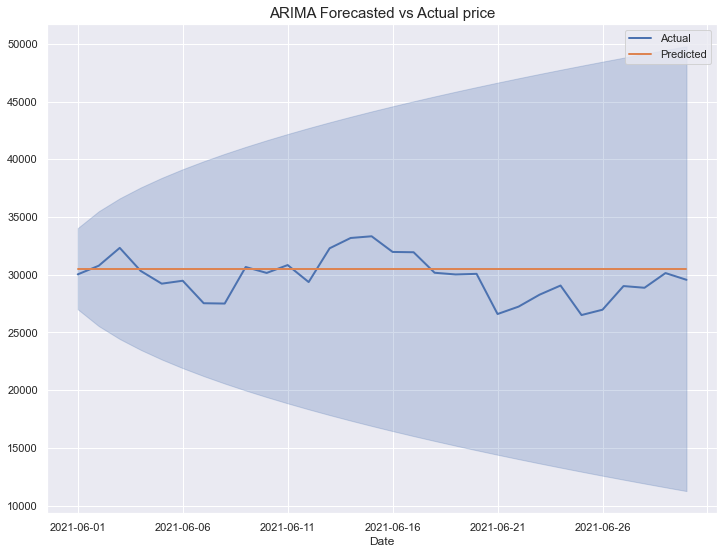

In [40]:
forecast_df = pd.DataFrame({'Actual': crypto_data_close.Close[-30:],'Predicted' : pred[-30:]})
forecast_df.plot(figsize=(12,9),lw=2)
plt.title('ARIMA Forecasted vs Actual price',size=15)
plt.fill_between(forecast_df.index[-30:], pred_conf_int[:,0], pred_conf_int[:,1], color='b', alpha=.25)

      lb_stat  lb_pvalue
30  10.882882   0.999462


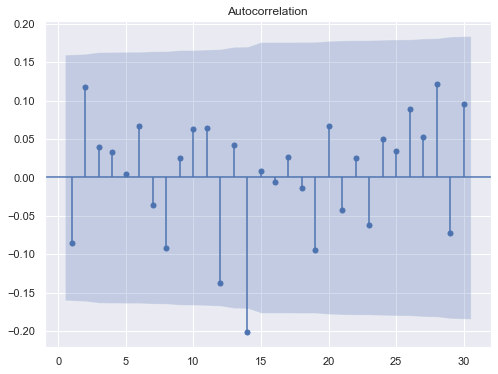

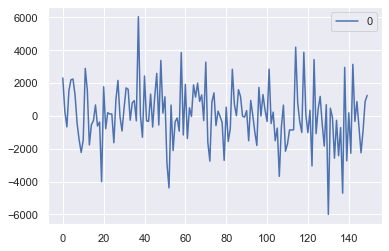

In [41]:
# plot residual errors

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

residuals = pd.DataFrame(arima_model.resid()[1:]) #exclusing 1st residual becoz its not modelled as we took differencing

import statsmodels.api as sm


p = plot_acf(residuals[0:],lags=30,zero=False) 

print(sm.stats.acorr_ljungbox(arima_model.resid(),lags=[30],return_df=True))
residuals.plot()

p.set_size_inches(8, 6)

In [187]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import pandas as pd
import numpy as np

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)


In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

crypto_data_close_diff = crypto_data_close.Close.diff().dropna().values.reshape(-1,1)

crypto_data_close_scaled = scaler.fit_transform(crypto_data_close_diff)

crypto_data_close_scaled = np.array([i.item() for i in crypto_data_close_scaled])


def get_timeseries_lookback(series,lookback):
    x,y = [],[]
    for time in range(lookback,len(series)):
        x.append(series[time-lookback:time])
        y.append(series[time])
    return np.array(x),np.array(y)

x,y = get_timeseries_lookback(crypto_data_close_scaled,lookback = 5)

x = x.reshape(x.shape[0],x.shape[1],1)
y = y.reshape(y.shape[0],1,1)

train_x,test_x = x[:-30],x[-30:]
train_y,test_y = y[:-30],y[-30:]

print(test_x.shape)
print(len(train_x))

(30, 5, 1)
145


In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# define model
reset_random_seeds()
model = Sequential()
model.add(LSTM(60, input_shape=(5, 1)))
model.add(Dropout(0.15))
model.add(Dense(1))
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=opt, loss='mse')

model_history = model.fit(train_x,train_y,epochs=250,verbose=2,batch_size=30,validation_data=(test_x, test_y),shuffle=False)

Epoch 1/250
5/5 - 2s - loss: 0.2647 - val_loss: 0.1910
Epoch 2/250
5/5 - 0s - loss: 0.1717 - val_loss: 0.1242
Epoch 3/250
5/5 - 0s - loss: 0.1163 - val_loss: 0.0829
Epoch 4/250
5/5 - 0s - loss: 0.0799 - val_loss: 0.0573
Epoch 5/250
5/5 - 0s - loss: 0.0581 - val_loss: 0.0414
Epoch 6/250
5/5 - 0s - loss: 0.0477 - val_loss: 0.0314
Epoch 7/250
5/5 - 0s - loss: 0.0377 - val_loss: 0.0253
Epoch 8/250
5/5 - 0s - loss: 0.0317 - val_loss: 0.0215
Epoch 9/250
5/5 - 0s - loss: 0.0291 - val_loss: 0.0192
Epoch 10/250
5/5 - 0s - loss: 0.0274 - val_loss: 0.0178
Epoch 11/250
5/5 - 0s - loss: 0.0258 - val_loss: 0.0169
Epoch 12/250
5/5 - 0s - loss: 0.0248 - val_loss: 0.0164
Epoch 13/250
5/5 - 0s - loss: 0.0234 - val_loss: 0.0161
Epoch 14/250
5/5 - 0s - loss: 0.0223 - val_loss: 0.0159
Epoch 15/250
5/5 - 0s - loss: 0.0242 - val_loss: 0.0158
Epoch 16/250
5/5 - 0s - loss: 0.0228 - val_loss: 0.0157
Epoch 17/250
5/5 - 0s - loss: 0.0221 - val_loss: 0.0156
Epoch 18/250
5/5 - 0s - loss: 0.0239 - val_loss: 0.0156
E

Text(0.5, 0, 'Epoch')

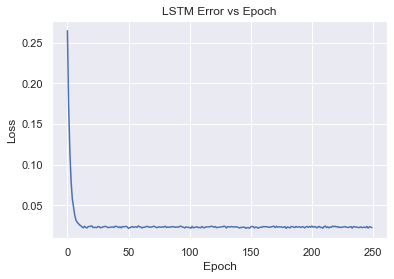

In [190]:
epochs = model_history.params['epochs']
loss = model_history.history['loss']

plt.plot(range(epochs),loss)
plt.title('LSTM Error vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [191]:
def get_price_from_diff(index,value):
    return crypto_data_close.Close[index-1]+value

In [192]:
pred = []
for test in test_x:
    test = test.reshape((test.shape[1],test.shape[0],1))
    yhat = model.predict(test, verbose=0).item()
    pred.append(yhat)


pred = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
forecast_prices = []

for index,forecast in enumerate(pred):
    if index == 0:
        forecast_prices.append(get_price_from_diff(index - 30,forecast))
    else:
        forecast_prices.append(forecast_prices[len(forecast_prices)-1]+forecast)

Text(0.5, 1.0, 'LSTM Forecast for Cryptocurrency price prediction')

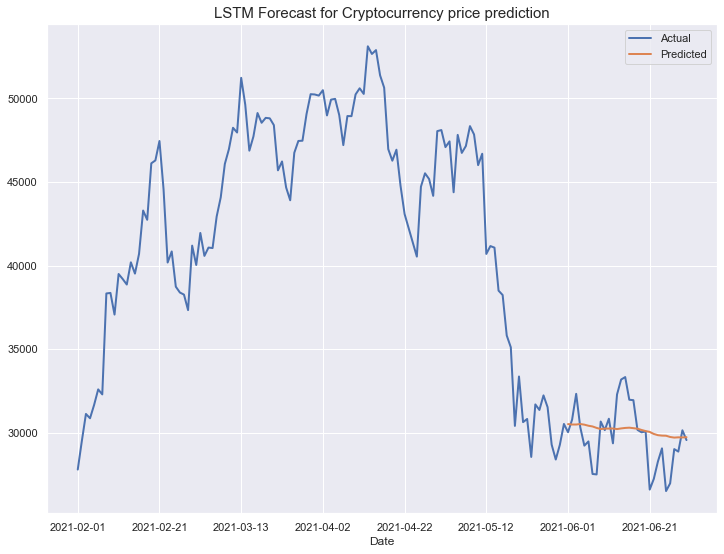

In [193]:
'''
fitted = model.predict(train_x)
fit = scaler.inverse_transform(fitted)
'''

fitted = model.predict(train_x)
fit = []
for index,forecast in enumerate(fitted):
    forecast = scaler.inverse_transform(forecast.reshape(1, -1))
    fit.append(get_price_from_diff(index -145 - 30,forecast.item()))
    

pred = np.append(np.repeat(np.nan,5279, axis=0),forecast_prices)
fitd = np.append(np.array(fit),np.repeat(np.nan,30, axis=0))
forecast_df = pd.DataFrame({'Actual': crypto_data_close.Close[-150:],'Predicted' : pred[-150:]})
forecast_df.plot(figsize=(12,9),lw = 2)
plt.title('LSTM Forecast for Cryptocurrency price prediction',size=15)

Text(0.5, 1.0, 'LSTM Forecast Vs Actual bitcoin price')

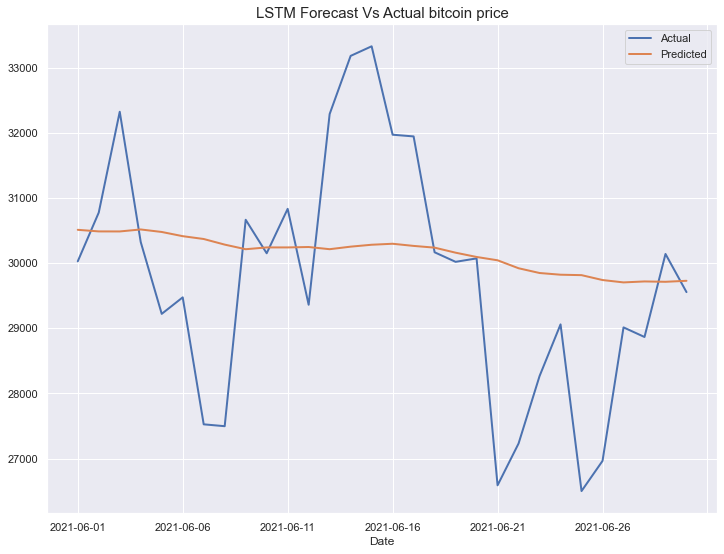

In [194]:
#fit =  np.append(arima_model.predict_in_sample(),np.repeat(np.nan,15, axis=0))[1:] # first value is zero since we did differencing
pred = np.append(np.repeat(np.nan,145, axis=0),forecast_prices[-30:])
forecast_df = pd.DataFrame({'Actual': crypto_data_close.Close[-30:],'Predicted' : pred[-30:]})
forecast_df.plot(figsize=(12,9),lw=2)
plt.title('LSTM Forecast Vs Actual bitcoin price',size=15)

In [195]:
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)*100)

def get_metrics(weeks,actual,pred):
    print('{} weeks forecast metrics'.format(weeks))
    span = 7*weeks
    error = mean_squared_error(actual[:span], pred[:span])
    print('Test RMSE: {}'.format(np.sqrt(error)))
    print('Test MAPE: {}\n'.format(mean_absolute_percentage_error(actual[:span], pred[:span])))

    
forecast_prices = pd.Series(np.array(forecast_prices).reshape(1,-1)[0]).values
lstm_inr_forecast = forecast_prices

get_metrics(2,crypto_data_close.Close[-30:],forecast_prices)
get_metrics(4,crypto_data_close.Close[-30:],forecast_prices)

2 weeks forecast metrics
Test RMSE: 1608.8601550173191
Test MAPE: 4.197150550032525

4 weeks forecast metrics
Test RMSE: 1824.8652022455212
Test MAPE: 4.940993117967591



In [196]:
model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 60)                14880     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 61        
Total params: 14,941
Trainable params: 14,941
Non-trainable params: 0
_________________________________________________________________


In [52]:

from scipy.stats import ttest_ind

ttest_ind(arima_inr_forecast,lstm_inr_forecast)

Ttest_indResult(statistic=8.17576925875326, pvalue=3.110011735039261e-11)

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [54]:
crypto_data_close = pd.read_csv('Crypto_data_preprocessed.csv',index_col=0)
crypto_data_close

,Open,High,Low,Close,Volume,Hashrate,Gtrends,Tweets
Date,,,,,,,,
2021-01-01,23735.42383,24316.91602,23649.96094,24165.55664,3.350805e+10,1.500531e+20,139.530,55480
2021-01-02,24167.45117,27321.90625,23972.96680,26474.89258,5.592538e+10,1.365966e+20,243.368,145059
2021-01-03,26476.65625,28519.63086,26413.12891,26760.72070,6.421624e+10,1.419998e+20,285.763,141596
2021-01-04,26784.33203,27294.24023,23363.98047,26094.00586,6.624190e+10,1.574032e+20,235.192,82412
2021-01-05,26098.18945,28009.36719,24633.16797,27639.48242,5.492320e+10,1.504341e+20,195.552,68133
...,...,...,...,...,...,...,...,...
2021-06-26,26466.72266,27343.60742,25288.42383,26965.50195,3.232664e+10,1.010427e+20,123.001,105096
2021-06-27,27050.32617,29021.04102,26869.55859,29013.74219,2.973553e+10,7.566617e+19,121.520,122259
2021-06-28,29038.42383,29497.71680,28473.47266,28866.30273,2.841210e+10,6.800884e+19,123.001,128407


In [55]:
crypto_data_close_diff = crypto_data_close.copy()
for col in crypto_data_close_diff.columns:
    crypto_data_close_diff[col] = crypto_data_close_diff[col].diff()
    
crypto_data_close_diff= crypto_data_close_diff.dropna()

train = crypto_data_close_diff[:-30]
test = crypto_data_close_diff[-30:]

In [56]:
crypto_data_close_diff

,Open,High,Low,Close,Volume,Hashrate,Gtrends,Tweets
Date,,,,,,,,
2021-01-02,432.02734,3004.99023,323.00586,2309.33594,2.241734e+10,-1.345653e+19,103.838,89579.0
2021-01-03,2309.20508,1197.72461,2440.16211,285.82812,8.290859e+09,5.403162e+18,42.395,-3463.0
2021-01-04,307.67578,-1225.39063,-3049.14844,-666.71484,2.025654e+09,1.540340e+19,-50.571,-59184.0
2021-01-05,-686.14258,715.12696,1269.18750,1545.47656,-1.131869e+10,-6.969040e+18,-39.640,-14279.0
2021-01-06,1558.51953,1880.33789,2621.55078,2205.37696,6.096248e+09,6.411297e+18,27.156,18498.0
...,...,...,...,...,...,...,...,...
2021-06-26,-2590.18750,-2366.49414,-974.08594,462.66015,-1.374624e+09,-5.585503e+18,-13.240,-48990.0
2021-06-27,583.60351,1677.43360,1581.13476,2048.24024,-2.591113e+09,-2.537651e+19,-1.481,17163.0
2021-06-28,1988.09766,476.67578,1603.91407,-147.43946,-1.323428e+09,-7.657325e+18,1.481,6148.0


In [57]:
def get_diff(df,lookback): 
    x,y = [],[]
    history = list(range(lookback))
    history.reverse()
    op_columns = [cols +'_L'+str(lag+1) for cols in df.columns for lag in history ]
    for time in range(lookback,len(df)):
        x_tmp = []
        for col in range(len(df.columns)):
            if col ==0:
                x_tmp = list(df.iloc[:,col][time-lookback:time].values)
            else:
                x_tmp.extend(list(df.iloc[:,col][time-lookback:time].values))
        x.append(x_tmp)
    return pd.DataFrame(np.array(x),columns=op_columns)


exog = get_diff(crypto_data_close_diff[['Volume','Hashrate','Gtrends','Tweets']],5)

# Gold =  3 lag & NIFTY = 5 lag
exog = exog[['Volume_L3', 'Volume_L2', 'Volume_L1', 'Hashrate_L3',
       'Hashrate_L2','Hashrate_L1',
       'Gtrends_L2', 'Gtrends_L2','Gtrends_L1','Tweets_L3','Tweets_L2','Tweets_L1']]

train = crypto_data_close_diff[5:-30]
test = crypto_data_close_diff[-30:]

train_exog = exog[:-30]
test_exog = exog[-30:]

train_exog.index = train.index
test_exog.index = test.index

exog

,Volume_L3,Volume_L2,Volume_L1,Hashrate_L3,Hashrate_L2,Hashrate_L1,Gtrends_L2,Gtrends_L2,Gtrends_L1,Tweets_L3,Tweets_L2,Tweets_L1
0,2.025654e+09,-1.131869e+10,6.096248e+09,1.540340e+19,-6.969040e+18,6.411297e+18,-39.640,-39.640,27.156,-59184.0,-14279.0,18498.0
1,-1.131869e+10,6.096248e+09,8.066102e+09,-6.969040e+18,6.411297e+18,1.612262e+18,27.156,27.156,98.274,-14279.0,18498.0,38405.0
2,6.096248e+09,8.066102e+09,2.986046e+09,6.411297e+18,1.612262e+18,-1.464474e+19,98.274,98.274,5.123,18498.0,38405.0,-11476.0
3,8.066102e+09,2.986046e+09,-2.136880e+10,1.612262e+18,-1.464474e+19,-2.635715e+18,5.123,5.123,-78.357,38405.0,-11476.0,-28835.0
4,2.986046e+09,-2.136880e+10,1.492397e+10,-1.464474e+19,-2.635715e+18,1.229625e+19,-78.357,-78.357,-4.134,-11476.0,-28835.0,-9761.0
...,...,...,...,...,...,...,...,...,...,...,...,...
170,-1.057589e+10,-1.105350e+10,5.931861e+09,-4.470454e+18,3.336300e+18,7.100011e+18,-21.503,-21.503,1.802,-28807.0,-19371.0,48430.0
171,-1.105350e+10,5.931861e+09,-1.374624e+09,3.336300e+18,7.100011e+18,-5.585503e+18,1.802,1.802,-13.240,-19371.0,48430.0,-48990.0
172,5.931861e+09,-1.374624e+09,-2.591113e+09,7.100011e+18,-5.585503e+18,-2.537651e+19,-13.240,-13.240,-1.481,48430.0,-48990.0,17163.0
173,-1.374624e+09,-2.591113e+09,-1.323428e+09,-5.585503e+18,-2.537651e+19,-7.657325e+18,-1.481,-1.481,1.481,-48990.0,17163.0,6148.0


In [58]:
def get_diff(df,lookback):
    x,y,col_name = [],[],[]
    for col in lookback.keys():
        lags = list(range(lookback[col]))
        lags.reverse()
        col_name.extend([col +'_L'+str(lag+1) for lag in lags])
    for col in lookback.keys():
        x_tmp = []
        for time in range(lookback[col],len(df)):
            if x_tmp ==[]:
                x_tmp = np.array([list(df[col][time-lookback[col]:time].values)])
            else:
                x_tmp = np.append(x_tmp,np.array([list(df[col][time-lookback[col]:time].values)]),axis=0)
        x.append(x_tmp)
    
    min_row = min([i.shape[0] for i in x])
    op = x[0][-min_row:,:]
    for item in x[1:]:
        op = np.append(op,item[-min_row:,:],axis =1)
        
    return pd.DataFrame(op,columns=col_name)

In [59]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


parm_dict = {}
aic=[]
for p in range(1,6):
    for d in range(1,6):
        x = get_diff(crypto_data_close_diff[['Close','Volume','Hashrate','Gtrends','Tweets']],{'Close':p,'Volume':d,'Hashrate':d,'Gtrends':d,'Tweets':d})
        id = max(p,d)    
        train = crypto_data_close_diff[id:-30]
        test = crypto_data_close_diff[-30:]
        train_exog = x[:-30]
        test_exog = x[-30:]
        train_exog.index = train.index
        test_exog.index = test.index
        model = sm.OLS(crypto_data_close_diff[id:-30].Close, sm.add_constant(train_exog))
        results = model.fit()
        aic.append(results.rsquared_adj)
        parm_dict[(p,d)]=results.rsquared_adj

list(parm_dict.keys())[aic.index(max(aic))]

(2, 5)

In [60]:
x = get_diff(crypto_data_close_diff[['Close','Volume','Hashrate','Gtrends','Tweets']],{'Close':5,'Volume':5,'Hashrate':5,'Gtrends':5,'Tweets':5})

train = crypto_data_close_diff[5:-30]
test = crypto_data_close_diff[-30:]

train_exog = x[:-30]
test_exog = x[-30:]

train_exog.index = train.index
test_exog.index = test.index

In [61]:
import statsmodels.api as sm

model = sm.OLS(crypto_data_close_diff[5:-30].Close, sm.add_constant(train_exog))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2.696
Date:                Fri, 13 Aug 2021   Prob (F-statistic):            0.00647
Time:                        10:46:23   Log-Likelihood:                -1281.1
No. Observations:                 145   AIC:                             2582.
Df Residuals:                     135   BIC:                             2612.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.293e-06   4.91e-06      1.485      

In [62]:
def get_price_from_diff(index,value):
    return crypto_data_close.Close[index-1]+value

forecast_prices = []
for index,forecast in enumerate(results.predict(sm.add_constant(test_exog))):
    if index == 0:
        forecast_prices.append(get_price_from_diff(index - 30,forecast))
    else:
        forecast_prices.append(forecast_prices[len(forecast_prices)-1]+forecast)
ardl_forecast = forecast_prices

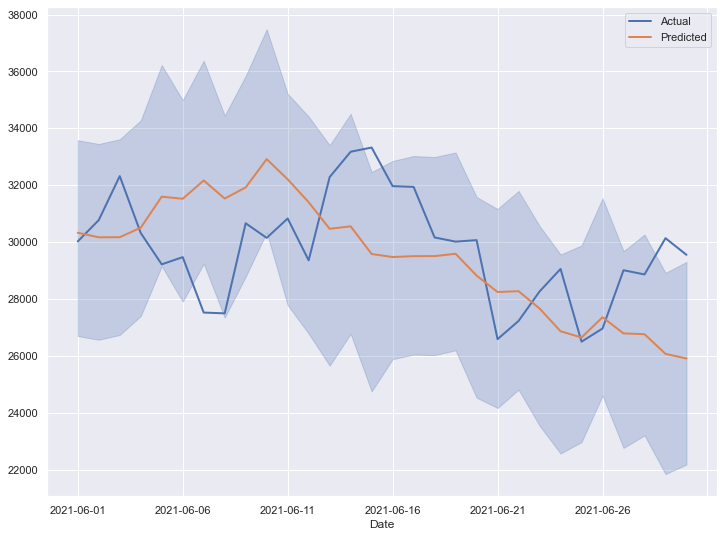

In [63]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
ci = wls_prediction_std(results, exog=sm.add_constant(test_exog), weights=None, alpha=0.05)
uci = np.array(ardl_forecast) + ci[2] 
lci = np.array(ardl_forecast) + ci[1] 

pd.DataFrame({'Actual':crypto_data_close[-30:].Close,'Predicted':ardl_forecast}).plot(figsize=(12,9),lw=2)
plt.fill_between( crypto_data_close[-30:].index, uci, lci, color='b', alpha=.25)

In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)*100)

from sklearn.metrics import mean_squared_error

def get_metrics(weeks,actual,pred):
    print('{} weeks forecast metrics'.format(weeks))
    span = 7*weeks
    error = mean_squared_error(actual[:span], pred[:span])
    print('Test RMSE: {}'.format(np.sqrt(error)))
    print('Test MAPE: {}\n'.format(mean_absolute_percentage_error(actual[:span], pred[:span])))

pred = forecast_prices
ardl_inr_forecast = ardl_forecast[-30:]
get_metrics(2,crypto_data_close.Close[-30:],ardl_forecast[-30:])
get_metrics(4,crypto_data_close.Close[-30:],ardl_forecast[-30:])

2 weeks forecast metrics
Test RMSE: 2364.609541250043
Test MAPE: 6.793259514891859

4 weeks forecast metrics
Test RMSE: 2113.598260790399
Test MAPE: 5.934006308349212



In [230]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import pandas as pd
import numpy as np

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

In [231]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [232]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

crypto_data_close_diff = crypto_data_close[['Close','Volume','Hashrate','Gtrends','Tweets']].values

crypto_data_close_scaled = scaler.fit_transform(crypto_data_close_diff)

crypto_data_close_scaled = pd.DataFrame(crypto_data_close_scaled)

def get_timeseries_lookback(df,lookback):
    x,y = [],[]
    for time in range(lookback,len(df)):
        x_tmp,y_tmp =[],[]
        for col in range(len(df.columns)):
            if col ==0:
                x_tmp = df.iloc[:,col][time-lookback:time].values.reshape(1,lookback)
                y_tmp = [df.iloc[:,col][time]]
            else:
                sec_arry = df.iloc[:,col][time-lookback:time].values.reshape(1,lookback)
                x_tmp = np.append(x_tmp,sec_arry,axis = 0)
                #y_tmp.append(df.iloc[:,col][time])
        x_tmp= np.dstack(x_tmp).reshape(1,lookback,len(df.columns))
        x.append(x_tmp)
        y.append(y_tmp)
    x = np.array(x)
    x = x.reshape(x.shape[0],x.shape[2],x.shape[3])
    return x,np.array(y)

x,y = get_timeseries_lookback(crypto_data_close_scaled,lookback = 5)

In [233]:
#x = x.reshape(x.shape[0],x.shape[1],1)
y = y.reshape(y.shape[0],)

train_x,test_x = x[:-30],x[-30:]
train_y,test_y = y[:-30],y[-30:]

print(train_x.shape,test_y.shape)

(146, 5, 5) (30,)


In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# define model
reset_random_seeds()
model = Sequential()
model.add(LSTM(50,input_shape=(5, 5)))
##model.add(Dropout(0.10))
model.add(Dense(1))
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=opt, loss='mse')

model_history = model.fit(train_x,train_y,epochs=250,verbose=2,batch_size=30,validation_data=(test_x, test_y),shuffle=False)

Epoch 1/250
5/5 - 1s - loss: 0.3319 - val_loss: 0.0091
Epoch 2/250
5/5 - 0s - loss: 0.1985 - val_loss: 0.0045
Epoch 3/250
5/5 - 0s - loss: 0.1306 - val_loss: 0.0136
Epoch 4/250
5/5 - 0s - loss: 0.0959 - val_loss: 0.0261
Epoch 5/250
5/5 - 0s - loss: 0.0781 - val_loss: 0.0378
Epoch 6/250
5/5 - 0s - loss: 0.0688 - val_loss: 0.0472
Epoch 7/250
5/5 - 0s - loss: 0.0637 - val_loss: 0.0541
Epoch 8/250
5/5 - 0s - loss: 0.0606 - val_loss: 0.0590
Epoch 9/250
5/5 - 0s - loss: 0.0587 - val_loss: 0.0622
Epoch 10/250
5/5 - 0s - loss: 0.0572 - val_loss: 0.0641
Epoch 11/250
5/5 - 0s - loss: 0.0560 - val_loss: 0.0651
Epoch 12/250
5/5 - 0s - loss: 0.0550 - val_loss: 0.0654
Epoch 13/250
5/5 - 0s - loss: 0.0540 - val_loss: 0.0653
Epoch 14/250
5/5 - 0s - loss: 0.0530 - val_loss: 0.0648
Epoch 15/250
5/5 - 0s - loss: 0.0521 - val_loss: 0.0641
Epoch 16/250
5/5 - 0s - loss: 0.0512 - val_loss: 0.0633
Epoch 17/250
5/5 - 0s - loss: 0.0503 - val_loss: 0.0624
Epoch 18/250
5/5 - 0s - loss: 0.0494 - val_loss: 0.0614
E

Text(0.5, 0, 'Epoch')

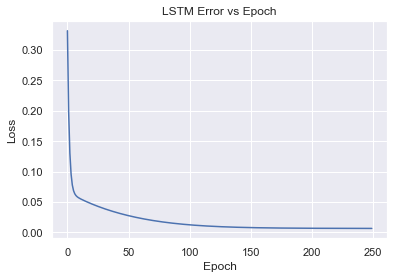

In [235]:
epochs = model_history.params['epochs']
loss = model_history.history['loss']

plt.plot(range(epochs),loss)
plt.title('LSTM Error vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [236]:
def get_price_from_diff(index,value):
    return crypto_data_close.Close[index-1]+value

In [237]:
pred = model.predict(test_x)
pred = np.hstack((pred,pred,pred,pred,pred)) # dummy columns to invert the transdorm and finally will discard the dummy column outputs
pred = scaler.inverse_transform(pred)

forecast_prices = pred[:,0]


fitted = model.predict(train_x)
fitted = np.hstack((fitted,fitted,fitted,fitted,fitted)) # dummy columns to invert the transdorm and finally will discard the dummy column outputs
fitted = scaler.inverse_transform(fitted)
fitted = fitted[:,0]

Text(0.5, 1.0, 'LSTM Forecast for bitcoin price')

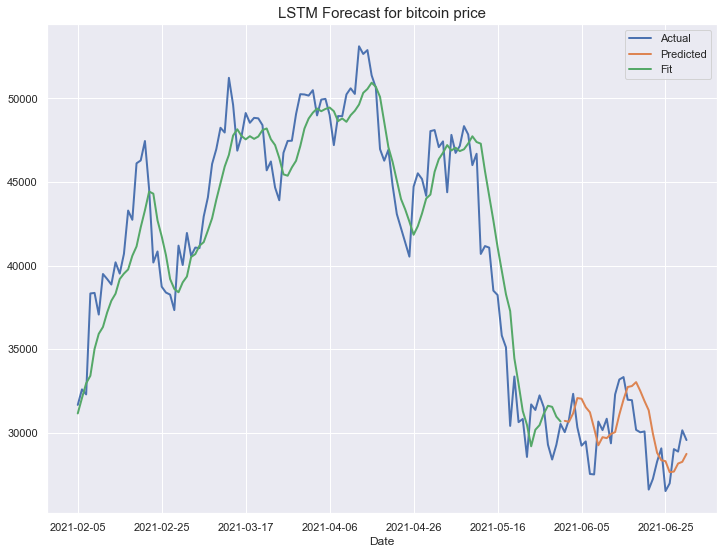

In [238]:
#fit =  np.append(arima_model.predict_in_sample(),np.repeat(np.nan,15, axis=0))[1:] # first value is zero since we did differencing
pred = np.append(np.repeat(np.nan,146, axis=0),forecast_prices)
fitd = np.append(np.array(fitted),np.repeat(np.nan,30, axis=0))
forecast_df = pd.DataFrame({'Actual': crypto_data_close.Close[-146:],'Predicted' : pred[-146:], 'Fit':fitd[-146:]})
forecast_df.plot(figsize=(12,9),lw = 2)
plt.title('LSTM Forecast for bitcoin price',size=15)

In [239]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)*100)

from sklearn.metrics import mean_squared_error

def get_metrics(weeks,actual,pred):
    print('{} weeks forecast metrics'.format(weeks))
    span = 7*weeks
    error = mean_squared_error(actual[:span], pred[:span])
    print('Test RMSE: {}'.format(np.sqrt(error)))
    print('Test MAPE: {}\n'.format(mean_absolute_percentage_error(actual[:span], pred[:span])))

pred = pred.reshape(1,-1)[0]
lstm_inr_forecast = pred[-30:]
get_metrics(2,crypto_data_close.Close[-30:],pred[-30:])
get_metrics(4,crypto_data_close.Close[-30:],pred[-30:])

2 weeks forecast metrics
Test RMSE: 1919.40871138419
Test MAPE: 5.505783075823625

4 weeks forecast metrics
Test RMSE: 1972.054979943071
Test MAPE: 5.655605231998865



In [240]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 50)                11200     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


In [76]:
from scipy.stats import ttest_ind

ttest_ind(ardl_inr_forecast,lstm_inr_forecast)

Ttest_indResult(statistic=-4.783353772641779, pvalue=1.2238157802490373e-05)